In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [16]:
df = pd.read_csv('cookie_cats.csv')

#Print info on the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  bool  
 4   retention_7     90189 non-null  bool  
dtypes: bool(2), int64(2), object(1)
memory usage: 2.2+ MB


## I. Inspect dataframe

In [17]:
#Print null values

df.isnull().sum()

userid            0
version           0
sum_gamerounds    0
retention_1       0
retention_7       0
dtype: int64

In [11]:
#Print duplicates

df.duplicated().sum()

0

In [12]:
#Print first ten rows of the dataframe

df.head(10)

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True
5,540,gate_40,187,True,True
6,1066,gate_30,0,False,False
7,1444,gate_40,2,False,False
8,1574,gate_40,108,True,True
9,1587,gate_40,153,True,False


In [13]:
#Check for misspellings in 'version' column

df['version'].value_counts()

gate_40    45489
gate_30    44700
Name: version, dtype: int64

## II. EDA 

In [62]:
#Set Seaborn palette for the entire notebook
sns.set_palette("Set2")

In [19]:
#Print number of unique users

df['userid'].nunique()

90189

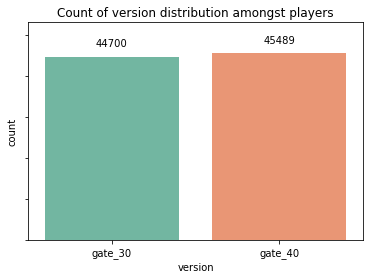

In [73]:
#Plot count of version distribution

ax = sns.countplot(x='version', data=df)
plt.title('Count of version distribution amongst players')

for container in ax.containers:
    ax.bar_label(container, padding=8)

# Remove the labels on the y-axis
ax.set_ylim(0, 53000)
ax.set_yticklabels([])
ax.grid(False)

#Save file to jpeg
plt.savefig('gate_distribtion.jpeg', format='jpeg', dpi=300)

# Show the plot
plt.show()

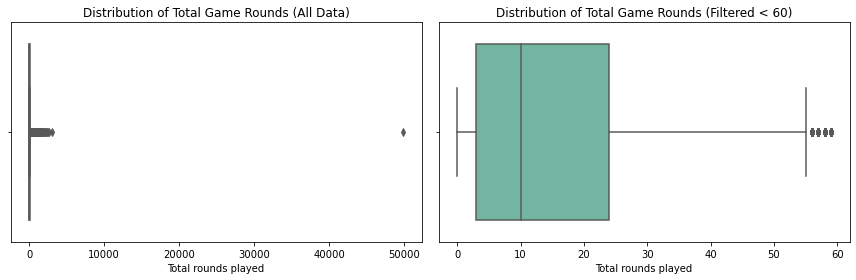

In [89]:
# Create a figure with two subplots (1 row, 2 columns)
fig, ax = plt.subplots(1, 2, figsize=(12, 4), sharex=False)

# Plot the sum of game rounds (full data)
sns.boxplot(x='sum_gamerounds', data=df, ax=ax[0])
ax[0].set_title('Distribution of Total Game Rounds (All Data)')
ax[0].set_xlabel('Total rounds played')

# Plot the sum of game rounds with minimal outliers (filtered data)
sns.boxplot(x='sum_gamerounds', data=df[df['sum_gamerounds'] < 60], ax=ax[1])
ax[1].set_title('Distribution of Total Game Rounds (Filtered < 60)')
ax[1].set_xlabel('Total rounds played')

# Adjust the layout
plt.tight_layout()

#Save file to jpeg
plt.savefig('game_rounds.jpeg', format='jpeg', dpi=300)

# Show the plot
plt.show()

In [99]:
df['sum_gamerounds'].describe()

count    90189.000000
mean        51.872457
std        195.050858
min          0.000000
25%          5.000000
50%         16.000000
75%         51.000000
max      49854.000000
Name: sum_gamerounds, dtype: float64

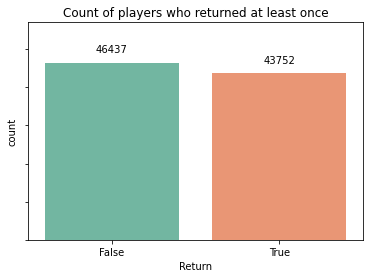

In [100]:
#Count number of players who returned at least once to the game
#Apply lambda function

df['returned'] = df.apply(lambda row: row['retention_1'] or row['retention_7'], axis=1)

#Plot retention

ax = sns.countplot(x='returned', data=df)

plt.title('Count of players who returned at least once')

for container in ax.containers:
    ax.bar_label(container, padding=8)

ax.set_xlabel('Return')
ax.set_ylim(0, 57000)
ax.set_yticklabels([])
ax.grid(False)

#Save file to jpeg
plt.savefig('return_count.jpeg', format='jpeg', dpi=300)

# Show the plot
plt.show()

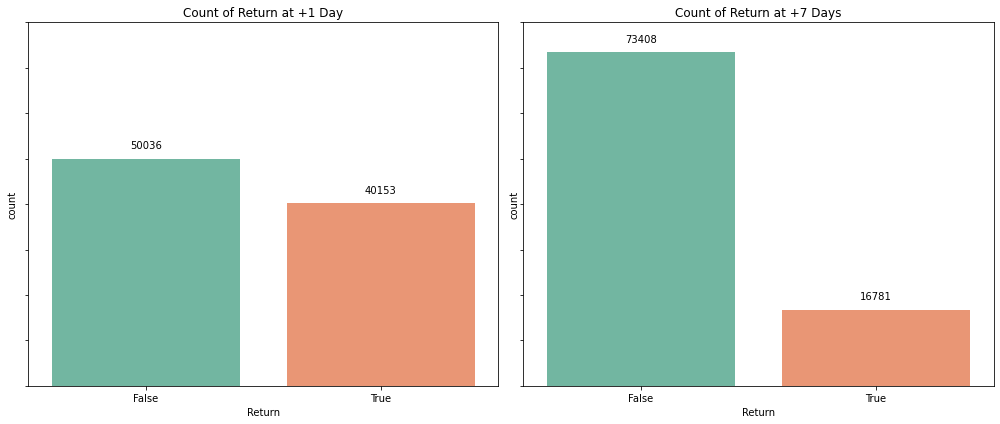

In [95]:
#Plot retention

# Create a figure with two subplots (1 row, 2 columns)
fig, ax = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Plot for 'retention_1'
sns.countplot(x='retention_1', data=df, ax=ax[0])
ax[0].set_title('Count of Return at +1 Day')
for container in ax[0].containers:
    ax[0].bar_label(container, padding=8)
    
ax[0].set_xlabel('Return')
ax[0].set_ylim(0, 76000)
ax[0].set_yticklabels([])
ax[0].grid(False)

# Plot for 'retention_7'
sns.countplot(x='retention_7', data=df, ax=ax[1])
ax[1].set_title('Count of Return at +7 Days')
for container in ax[1].containers:
    ax[1].bar_label(container, padding=8)
    
ax[1].set_xlabel('Return')
ax[1].set_ylim(0, 80000)
ax[1].set_yticklabels([])
ax[1].grid(False)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

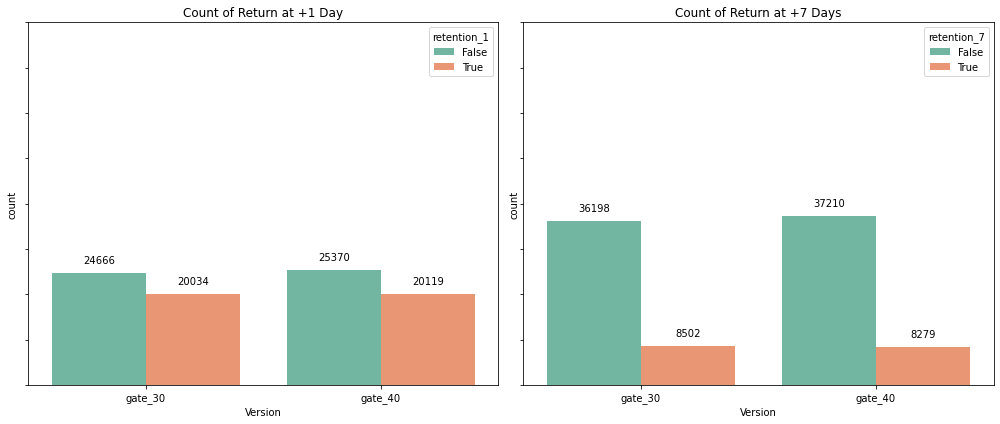

In [101]:
#Plot retention according to gate and day

# Create a figure with two subplots (1 row, 2 columns)
fig, ax = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Plot for 'retention_1'
sns.countplot(x='version', hue='retention_1', data=df, ax=ax[0])
ax[0].set_title('Count of Return at +1 Day')
for container in ax[0].containers:
    ax[0].bar_label(container, padding=8)
    
ax[0].set_xlabel('Version')
ax[0].set_ylim(0, 76000)  # Adjust this based on your data
ax[0].set_yticklabels([])
ax[0].grid(False)

# Plot for 'retention_7'
sns.countplot(x='version', hue='retention_7', data=df, ax=ax[1])
ax[1].set_title('Count of Return at +7 Days')
for container in ax[1].containers:
    ax[1].bar_label(container, padding=8)
    
ax[1].set_xlabel('Version')
ax[1].set_ylim(0, 80000)  # Adjust this based on your data
ax[1].set_yticklabels([])
ax[1].grid(False)

# Adjust layout
plt.tight_layout()

#Save file to jpeg
plt.savefig('retention_plot_gate.jpeg', format='jpeg', dpi=300)

# Show the plots
plt.show()

## III. A/B testing

### Define hypothesis


Null Hypothesis (H₀): There is no difference in player behavior between the two groups (gate_30 and gate_40).
<br>Alternative Hypothesis (H₁): There is a significant difference in player behavior between the two groups.

<br><b>Metric: </b> Return at +1 days after installation

In [49]:
#Contingency table

contingency_table_1 = pd.crosstab(df['version'], df['retention_1'])
contingency_table_1

retention_1,False,True
version,,
gate_30,24666,20034
gate_40,25370,20119


In [52]:
#Assign the total number of returned players to a 'successes' variable
successes = contingency_table_1[1]

#Assign the total number of players to a 'totals' variable
totals = contingency_table_1.sum(axis=1)

# Run z-test for proportions
z_stat, p_value = sm.stats.proportions_ztest(successes, totals)

# Output results
print(f"Z-statistic: {z_stat:.3f}")
print(f"P-value: {p_value:.3f}")

Z-statistic: 1.784
P-value: 0.074


<b>Metric: </b> Return at +7 days after installation

In [50]:
#Contingency table

contingency_table_7 = pd.crosstab(df['version'], df['retention_7'])
contingency_table_7

retention_7,False,True
version,,
gate_30,36198,8502
gate_40,37210,8279


In [51]:
#Assign the total number of returned players to a 'successes' variable
successes = contingency_table_7[1]

#Assign the total number of players to a 'totals' variable
totals = contingency_table_7.sum(axis=1)

# Run z-test for proportions
z_stat, p_value = sm.stats.proportions_ztest(successes, totals)

# Output results
print(f"Z-statistic: {z_stat:.3f}")
print(f"P-value: {p_value:.3f}")

Z-statistic: 3.164
P-value: 0.002


<b>The Z-statistic measures how many standard deviations the observed difference is from the null hypothesis (which often assumes no effect or no difference).</b>
<br>In our case, the Z-statistic is quite large and suggest the return rates at +7 days is higher for the second group ('gate_40') than the first group ('gate_30'). Furthermore, the p-value is less than 0.05 (p-value=0.002).  This implies that the observed increase in return rates for gate_40 compared to gate_30 is unlikely to be due to random variation.

### Calculate Cohen's h to determine effect size

In [60]:
# Proportions for each group
p1 = contingency_table_7[1][0] / (contingency_table_7[0][0]+contingency_table_7[1][0])  # Retention rate for gate_30
p2 = contingency_table_7[1][1] / (contingency_table_7[0][1]+contingency_table_7[1][1])  # Retention rate for gate_40

# Arcsine transformation
arcsin_p1 = np.arcsin(np.sqrt(p1))
arcsin_p2 = np.arcsin(np.sqrt(p2))

# Cohen's h calculation
cohens_h = 2 * (arcsin_p1 - arcsin_p2)
print(f"Cohen's h: {cohens_h:.3f}")

Cohen's h: 0.021


Though our z-test reflects statistical significance, calculating Cohen's h shows a small practical significance. This means that moving the gate from level 30 to level 40 might not be relevant from a business perspective, especially if it entails high costs.